# Final Assignment - Statistics for Data Science with Python - Abhishek Singh

#### Import the required libraries we need for the lab

In [29]:
pip install micropip

Note: you may need to restart the kernel to use updated packages.


In [30]:
import micropip
await micropip.install(['numpy'],['pandas'])
await micropip.install(['seaborn'])

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL

In [32]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment

In [33]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 1: Become familier with the dataset

In [34]:
boston_df.head(n=10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [35]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Task 2: Generate Descriptive Statistics and Visualizations

#### Q1: For the 'Median value of owner-occupied homes' provide a boxplot

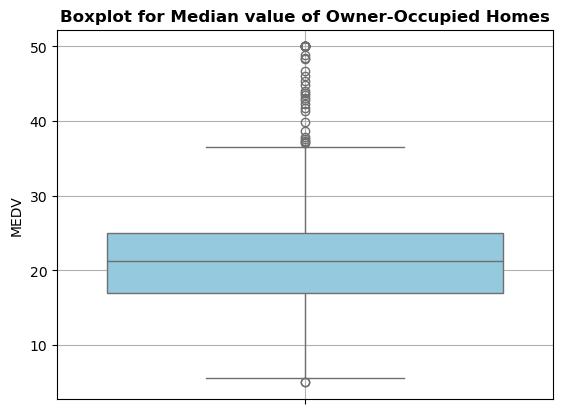

In [36]:
v1 = sns.boxplot(y='MEDV', data = boston_df, color  = 'skyblue')
v1.set_title ('Boxplot for Median value of Owner-Occupied Homes', fontsize=12, fontweight='bold')
v1.grid(True)

#### Q2: Provide a bar plot for the Charles river variable

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\3117855293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  v2 = sns.countplot(x = 'CHAS', data = boston_df, palette = 'Set2')


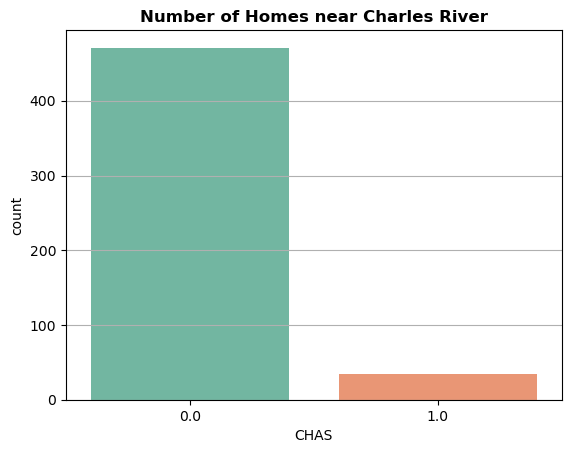

In [37]:
v2 = sns.countplot(x = 'CHAS', data = boston_df, palette = 'Set2')
v2.set_title ('Number of Homes near Charles River', fontsize=12, fontweight='bold')
v2.grid(True, axis = 'y')

#### Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [38]:
bin_range = [0, 35, 70, 200]
lab = ['35 yrs and younger','b/w 35 and 70 yrs','70 yrs and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins = bin_range, labels=lab, right=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\1121391391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  v3 = sns.boxplot(x='MEDV', y = 'AGE_GROUP', data = boston_df, palette = 'pastel')


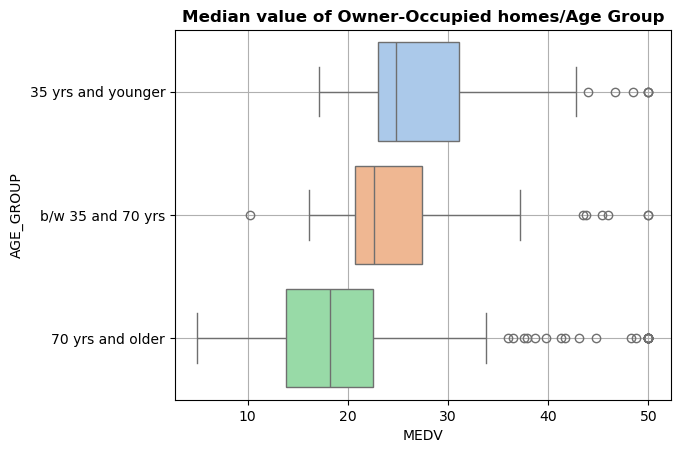

In [39]:
v3 = sns.boxplot(x='MEDV', y = 'AGE_GROUP', data = boston_df, palette = 'pastel')
v3.set_title ('Median value of Owner-Occupied homes/Age Group', fontsize=12, fontweight='bold')
v3.grid(True)

#### Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

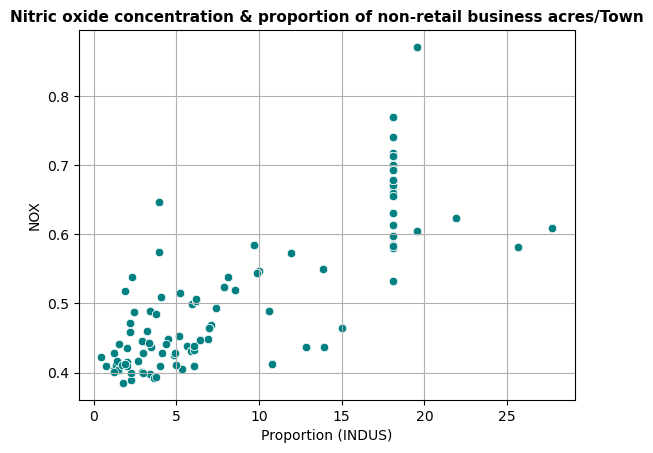

In [40]:
v4 = sns.scatterplot(y='NOX', x = 'INDUS', data = boston_df, color = 'teal')
v4.set_title ('Nitric oxide concentration & proportion of non-retail business acres/Town', fontsize=11, fontweight='bold')
pyplot.xlabel('Proportion (INDUS)')
v4.grid(True)

#### Q5: Create a histogram for the pupil to teacher ratio variable

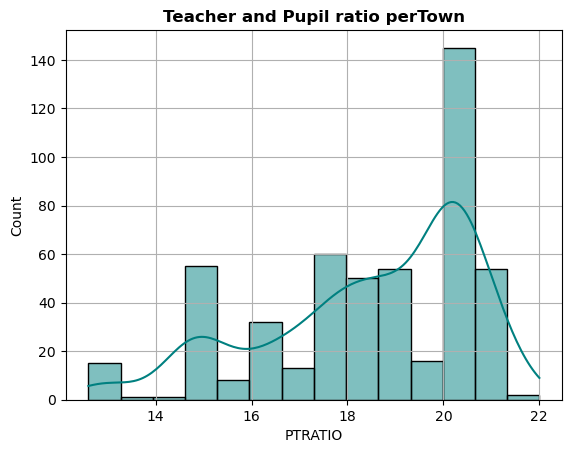

In [41]:
v5 = sns.histplot(x = 'PTRATIO', data = boston_df, color = 'teal', kde = True)
v5.set_title ('Teacher and Pupil ratio perTown', fontsize=12, fontweight='bold')
v5.grid(True)

### Task 3: Use the appropriate tests to answer the questions provided

#### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [42]:
medv_river = boston_df[boston_df['CHAS'] == 1 ] ['MEDV']
medv_non_river = boston_df[boston_df['CHAS'] == 0 ] ['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(medv_river, medv_non_river, equal_var = False)

In [43]:
print(f'T Statistic is: {t_stat: .4f} \nP-value is: {p_value: .4f}')

T Statistic is:  3.1133 
P-value is:  0.0036


#### Hypothesis:

Null Hypothesis: There is no significant difference in the median value of houses between far and near by Charles River.

Alternative Hypothesis: There is a significant difference in the median value of houses between far and near by Charles River

Significance level is defined as (α) = 0.05. If P-Value < 0.05; we reject the Null hypothesis and conclude that the difference is significant.

#### Conclusion:

Given that p-value (0.0036) < α (0.05), we reject the null hypothesis.

Hence, there is statistical significant difference in median value of far and near-by houses  by Charles River.

#### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [44]:
gp1 = boston_df[boston_df['AGE_GROUP'] == '35 yrs and younger']['MEDV']
gp2 = boston_df[boston_df['AGE_GROUP'] == 'b/w 35 and 70 yrs']['MEDV']
gp3 = boston_df[boston_df['AGE_GROUP'] == '70 yrs and older']['MEDV']

In [45]:
f_stat, p_value = scipy.stats.f_oneway(gp1, gp2, gp3)

print(f'F Statistic is: {f_stat: .4f} \nP-value is: {p_value: .4f}')

F Statistic is:  36.4076 
P-value is:  0.0000


#### Hypothesis:

Null Hypothesis: There is no statistical difference in the median value of houses (MEDV) across different age groups.

Alternative Hypothesis: There is a statistical difference in the median value of houses (MEDV) vs age group

Significance level is defined as (α) = 0.05. If P-Value < 0.05; we reject the Null hypothesis and conclude that the difference is statistical.

#### Conclusion:

Given that p-value (0.00) < α (0.05), we reject the null hypothesis.

Hence, there is statistical difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

#### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [46]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

#### Hypothesis:

Null Hypothesis: There is no statistical relation in Nitric Oxide concentration with proportion of non-retail business acres per town.

Alternative Hypothesis: There is statistical relationship in Nitric Oxide concentration with respect to proportion of non-retail business acres per town.

Significance level is defined as (α) = 0.05.

#### Conclusion:

As pvalue << 0.05, we reject the null hypothesis and conclude that there is a positive correlation between Nitric oxide concentration (NOX) and proportion of non-retail business acres per town.

#### Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [47]:
x = boston_df ['DIS']
y = boston_df ['MEDV']
x = sm.add_constant(x)

In [48]:
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        08:39:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(f'Correlation coefficient R (sqrt(R2) on linear regression is: {np.sqrt(0.062): 6.4f}')

Correlation coefficient R (sqrt(R2) on linear regression is:  0.2490


#### Hypothesis:

Null Hypothesis: The weighted distance of five Boston employment centers does not significantly predict median value of owner-occupied homes (MEDV)

Alternative Hypothesis: The weighted distance of five Boston employment centers significantly predict median value of owner-occupied homes (MEDV)

Significance level is defined as (α) = 0.05. If P-Value < 0.05; we reject the Null hypothesis and conclude that the difference is significant.

#### Conclusion:

Propability of F-Statistic is close to 0.00. as p-value << 0.05. We reject the hypothesis.

Conclusion is: there is an impact of distance to employment centers (DIS) on owner occupied homes (MEDV). MEDV tends to increase as distance of employment centers increases.
Nevertheless assuming a linear refression, the correlation factor R = 0.25 is relatively low.